In [ ]:
# Step 1: Import the main library we need for data handling
import pandas as pd



file_path = 'C:/ds/UDPLag.csv'

# --- Data Loading ---
print(f"Attempting to load the dataset from: {file_path}\n")
try:
    # We use pandas to read the CSV file into a table-like structure called a DataFrame.
    # Some large CSV files can have errors, 'on_bad_lines='skip'' helps ignore them.
    df = pd.read_csv(file_path, on_bad_lines='skip')
    # Add this line to see all available column names
    print(df.columns[-5:])
    # Add this line right below your df.head() or df.info()
    print(list(df.columns))
    print("✅ Success! Dataset loaded into a DataFrame.\n")
except FileNotFoundError:
    print("❌ ERROR: File not found.")
    print("Please make sure the 'file_path' variable is correct and you have downloaded the dataset.")
    # Stop the script if the file can't be found.
    exit()

# --- Data Exploration ---


# 1. Peek at the first 5 rows
print("--- 1. First 5 Rows of the Dataset ---")
print("This shows us the column names and the type of data in each column.")
print(df.head())
print("\n" + "="*60 + "\n")

# 2. Get a summary of all columns, their data types, and any missing values
print("--- 2. Dataset Information Summary ---")
print("Pay attention to 'Non-Null Count' to spot missing data and 'Dtype' for the data type.")
df.info() 
print("\n" + "="*60 + "\n")

# 3. Count the number of 'Benign' vs. 'DDoS' samples
print("--- 3. Class Distribution (Benign vs. Attack) ---")
print("This is crucial to see if our dataset is balanced.")
print(df[' Label'].value_counts())
print("\n" + "="*60 + "\n")

# 4. Get a statistical summary of the numerical columns
print("--- 4. Statistical Summary ---")
print("This calculates the mean, standard deviation, min, max, etc., for numerical features.")
# This option makes the numbers easier to read.
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
print(df.describe())
print("\n" + "="*60 + "\n")



Attempting to load the dataset from: C:/ds/UDPLag.csv



C:\Users\mseri\AppData\Local\Temp\ipykernel_19292\2862441399.py:19: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Index([' Idle Max', ' Idle Min', 'SimillarHTTP', ' Inbound', ' Label'], dtype='object')
['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Pack

c:\Users\mseri\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\mseri\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


       Unnamed: 0   Source Port   Destination Port   Protocol   Flow Duration  \
count  370,605.00    370,605.00         370,605.00 370,605.00      370,605.00   
mean   185,302.00     38,359.24          32,650.27       7.50    5,266,594.33   
std    106,984.59     17,813.79          19,081.44       3.78   12,500,774.73   
min          0.00          0.00               0.00       0.00            0.00   
25%     92,651.00     23,937.00          16,158.00       6.00            1.00   
50%    185,302.00     39,867.00          32,720.00       6.00            1.00   
75%    277,953.00     53,812.00          49,211.00       6.00          116.00   
max    370,604.00     65,532.00          65,535.00      17.00  119,999,992.00   

        Total Fwd Packets   Total Backward Packets  \
count          370,605.00               370,605.00   
mean                 2.97                     0.33   
std                 23.18                     2.46   
min                  1.00                     0.00   


In [ ]:


import numpy as np


df.columns = df.columns.str.strip().str.replace(' ', '_')

print("✅ Column names fixed. New names (example):")
print(df.columns[:5]) # Print the first 5 new column names
print("\n" + "="*60 + "\n")


# Step 2: Feature Selection (Choosing our 'ingredients')
# We select a small list of 10 powerful features + 1 label column.
# These are known to be good for detecting DDoS attacks.
selected_features = [
    'Flow_Duration',
    'Total_Fwd_Packets',
    'Total_Backward_Packets',
    'Total_Length_of_Fwd_Packets',
    'Total_Length_of_Bwd_Packets',
    'Fwd_Packet_Length_Mean',
    'Bwd_Packet_Length_Mean',
    'Flow_IAT_Mean',
    'Fwd_IAT_Total',
    'Protocol',
    'Label'  # Our all-important 'answer' column
]

# Create a new DataFrame 'df_clean' with ONLY our selected columns
df_clean = df[selected_features].copy()


# Step 3: Handle Bad Values (NaN and Infinity)
# Machine learning models can't handle missing (NaN) or infinite (Inf) numbers.
# We will remove any rows that contain them.

# Replace infinite values with NaN (a standard 'missing' marker)
df_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows that have 'NaN' values
df_clean.dropna(inplace=True)


# Step 4: Encode the 'Label' Column
# Convert text labels into numbers (0 for Benign, 1 for Attack)
# We can see from our previous exploration that 'UDP-lag' is the attack.
# We will create a new column 'is_attack'
df_clean['is_attack'] = df_clean['Label'].apply(lambda x: 1 if x == 'UDP-lag' else 0)

# Now we can drop the original text 'Label' column
df_clean.drop('Label', axis=1, inplace=True)

print("✅ 'Label' column encoded to 'is_attack':")
print(df_clean['is_attack'].value_counts())
print("\n" + "="*60 + "\n")


# Step 5: Split Data into Features (X) and Target (y)
# X = The "features" (the questions we ask the AI)
# y = The "target" (the 'is_attack' answer we want it to learn)

X = df_clean.drop('is_attack', axis=1) # All columns EXCEPT 'is_attack'
y = df_clean['is_attack']             # ONLY the 'is_attack' column


# Step 6: Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# This splits our data: 80% for training, 20% for testing
# random_state=42 ensures you get the same 'random' split every time you run this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data preprocessing complete!")
print(f"Total samples:    {len(X)}")
print(f"Training samples: {len(X_train)} (80%)")
print(f"Testing samples:  {len(X_test)} (20%)")

✅ Column names fixed. New names (example):
Index(['Unnamed:_0', 'Flow_ID', 'Source_IP', 'Source_Port', 'Destination_IP'], dtype='object')


✅ 'Label' column encoded to 'is_attack':
is_attack
1    366461
0      4144
Name: count, dtype: int64


✅ Data preprocessing complete!
Total samples:    370605
Training samples: 296484 (80%)
Testing samples:  74121 (20%)


Training the AI model
✅ Model training complete!

--- MODEL PERFORMANCE REPORT ---
Accuracy:  99.79%
Precision: 99.80%
Recall:    100.00%


--- CONFUSION MATRIX ---


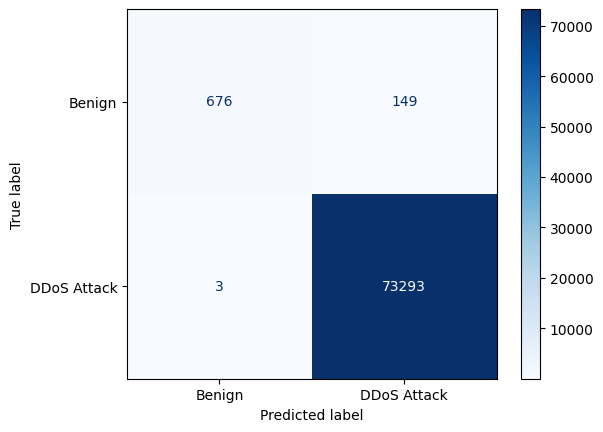

In [ ]:

# Step 1: Import the AI model and the evaluation metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 2: Create the AI model
# We'll use a Decision Tree. 'max_depth=5' prevents it from becoming too complex.
# 'random_state=42' ensures you get the same result every time you run it.
model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Step 3: Train the AI model
# This is where the learning happens!
# The model 'fits' itself to the patterns in your training data.
print("Training the AI model")
model.fit(X_train, y_train)
print("✅ Model training complete!\n")




# Step 4: Make predictions on the test data (the "final exam")
# We use the model to predict the answers for the X_test data.
y_pred = model.predict(X_test)


# Step 5: Calculate and print the results

print("--- MODEL PERFORMANCE REPORT ---")

# Accuracy: Overall, what percentage of predictions were correct?
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:  {accuracy * 100:.2f}%")

# Precision: Of all the 'Attack' alerts, how many were REAL attacks?
# (High precision = low false positives)
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision * 100:.2f}%")

# Recall: Of all the REAL attacks, how many did the model CATCH?
# (High recall = low false negatives)
recall = recall_score(y_test, y_pred)
print(f"Recall:    {recall * 100:.2f}%")
print("\n" + "="*60 + "\n")


# Step 6: Show the Confusion Matrix
# This is a table that shows us exactly where the model made its mistakes.
print("--- CONFUSION MATRIX ---")
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'DDoS Attack'])
disp.plot(cmap=plt.cm.Blues)
plt.show() # This command displays the plot